In [1]:
# Project 4: Heart Disease Prediction (Classification) 🩺
##Project Objective: To build a machine learning model that can accurately predict whether a patient has heart disease based on a set of medical attributes. This project will serve as a comprehensive introduction to classification, one of the most common types of machine learning problems.

In [2]:
##STEP 1 : IMPORT ALL THE IMPORTANT LIBRARIES
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler , OneHotEncoder , LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , recall_score , f1_score , confusion_matrix , classification_report

In [3]:
sns.set_style('whitegrid')

In [4]:
##STEP 2 : SETTING UP THE DATAFRAME
heart_df = pd.read_csv('heart_disease_uci.csv')

In [5]:
##STEP 3 : IMPLEMENT EDA
print(f'Statistical Information about Dataset :')
heart_df.describe()

Statistical Information about Dataset :


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [6]:
print(f'Overall Abstract Information about Dataset :')
heart_df.info()

Overall Abstract Information about Dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [7]:
heart_df.shape

(920, 16)

In [8]:
heart_df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [9]:
##STEP 4 : CHECKING AND HANDLING THE NULL VALUES
heart_df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [10]:
 heart_df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [11]:
##checked all the attributes with null values and they are broadly classified as : 
numeric_cols = ['trestbps' , 'chol' , 'thalch' , 'oldpeak']

binary_categorical_cols = ['fbs' , 'exang']

label_categorical_cols = ['restecg', 'slope' , 'thal','ca']

In [14]:
#impute all numeric_cols with the median values of the col
for col in numeric_cols:
    if heart_df[col].isnull().any():
        heart_df[col].fillna(heart_df[col].median())

#impute all the binary_categorical_cols with mode of the col
for col in binary_categorical_cols:
    if heart_df[col].isnull().any():
        heart_df[col].fillna(heart_df[col].mode())

#impute label_categorical_cols with mode pof the col
for col in label_categorical_cols:
    if heart_df[col].isnull().any():
        heart_df[col].fillna(heart_df[col].mode())


In [15]:
heart_df.isnull().sum().sum()

np.int64(1759)

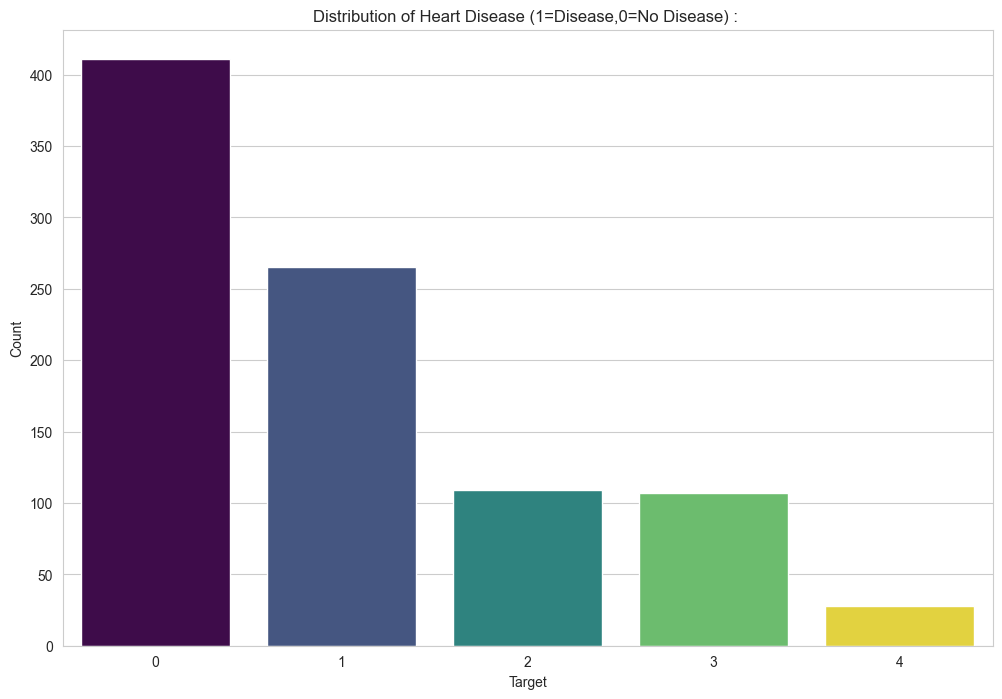

In [16]:
##STEP 5 : ANALYZING FEATURES 
plt.figure(figsize=(12,8))
sns.countplot(data=heart_df,x='num',hue='num',legend=False,palette='viridis').set_title('Distribution of Heart Disease (1=Disease,0=No Disease) : ')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [17]:
#OBSERVATION : '0' symbolizes that guy doesn't have any heart disease and '1','2','3','4' means person has some heart disease , of different levels/types/kinds

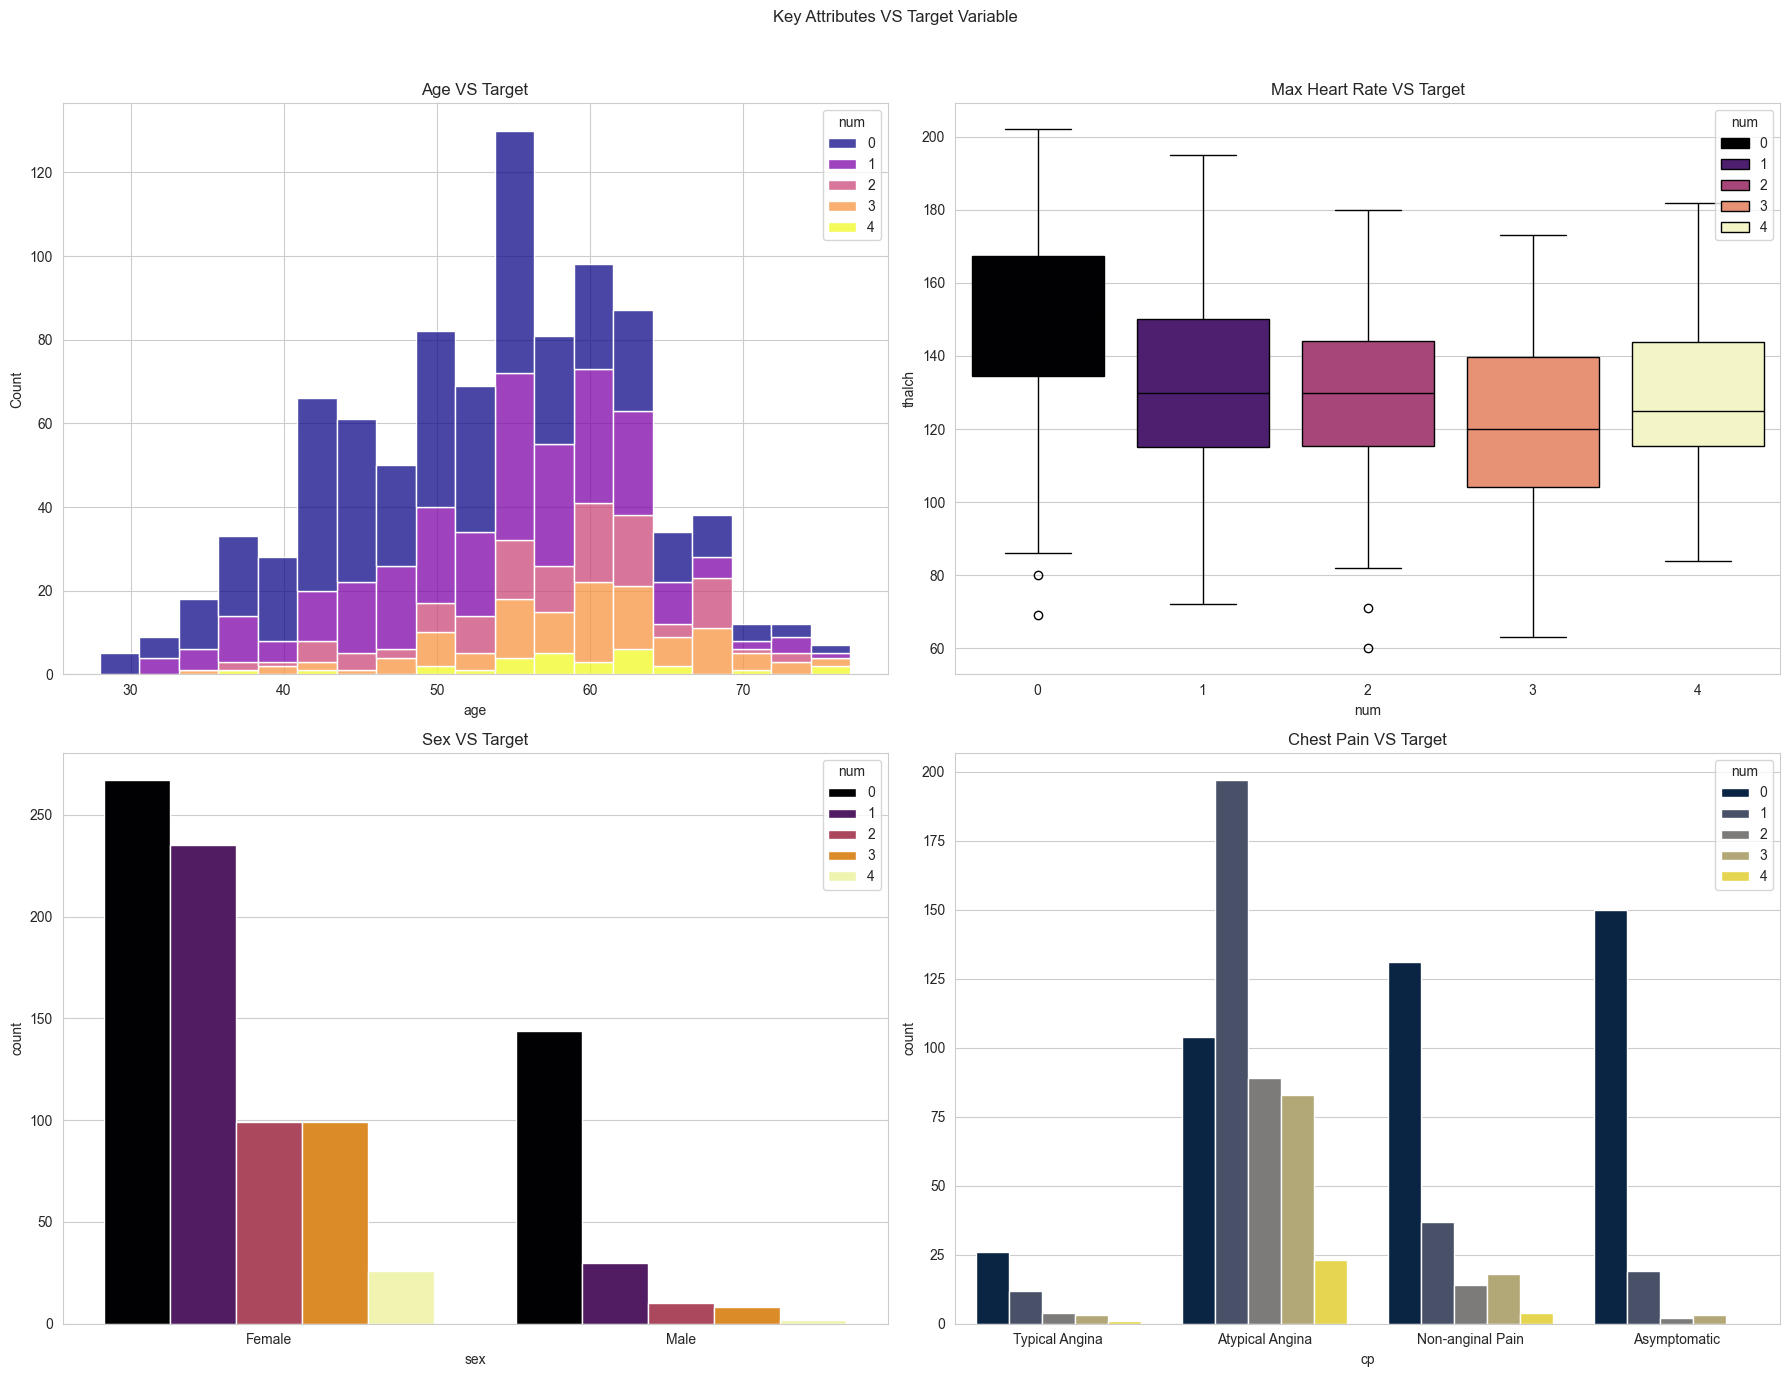

In [18]:
#visualizing the relationships between key features and the target
fig , axes = plt.subplots(2,2,figsize=(18,14))
fig.suptitle('Key Attributes VS Target Variable')

sns.histplot(ax=axes[0,0],data=heart_df,x='age',hue='num',multiple='stack',palette='plasma').set_title('Age VS Target')

sns.boxplot(ax=axes[0,1],data=heart_df,x='num',y='thalch',palette='magma',hue='num').set_title('Max Heart Rate VS Target')

gender_plot = sns.countplot(ax=axes[1,0],data=heart_df,x='sex',hue='num',palette='inferno')
gender_plot.set_title('Sex VS Target')
#we are basically setting up the x-axis labels with the following:
gender_plot.set_xticks(range(len(heart_df['sex'].unique())))
gender_plot.set_xticklabels(['Female','Male'])

cp_plot = sns.countplot(ax=axes[1,1],data=heart_df,x='cp',hue='num',palette='cividis')
cp_plot.set_title('Chest Pain VS Target')
cp_plot.set_xticks(range(len(heart_df['cp'].unique())))
cp_plot.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [19]:
#OBSERVATION : 
##1. People with no heart disease tend to have more max. heart rate
##2. Typically 'Female' show more levels of heart diseases compared to 'Male' population
##3. Patients with chest pain-'Atypical Angina' and 'Non-aginal Pain' tend to have heart disease

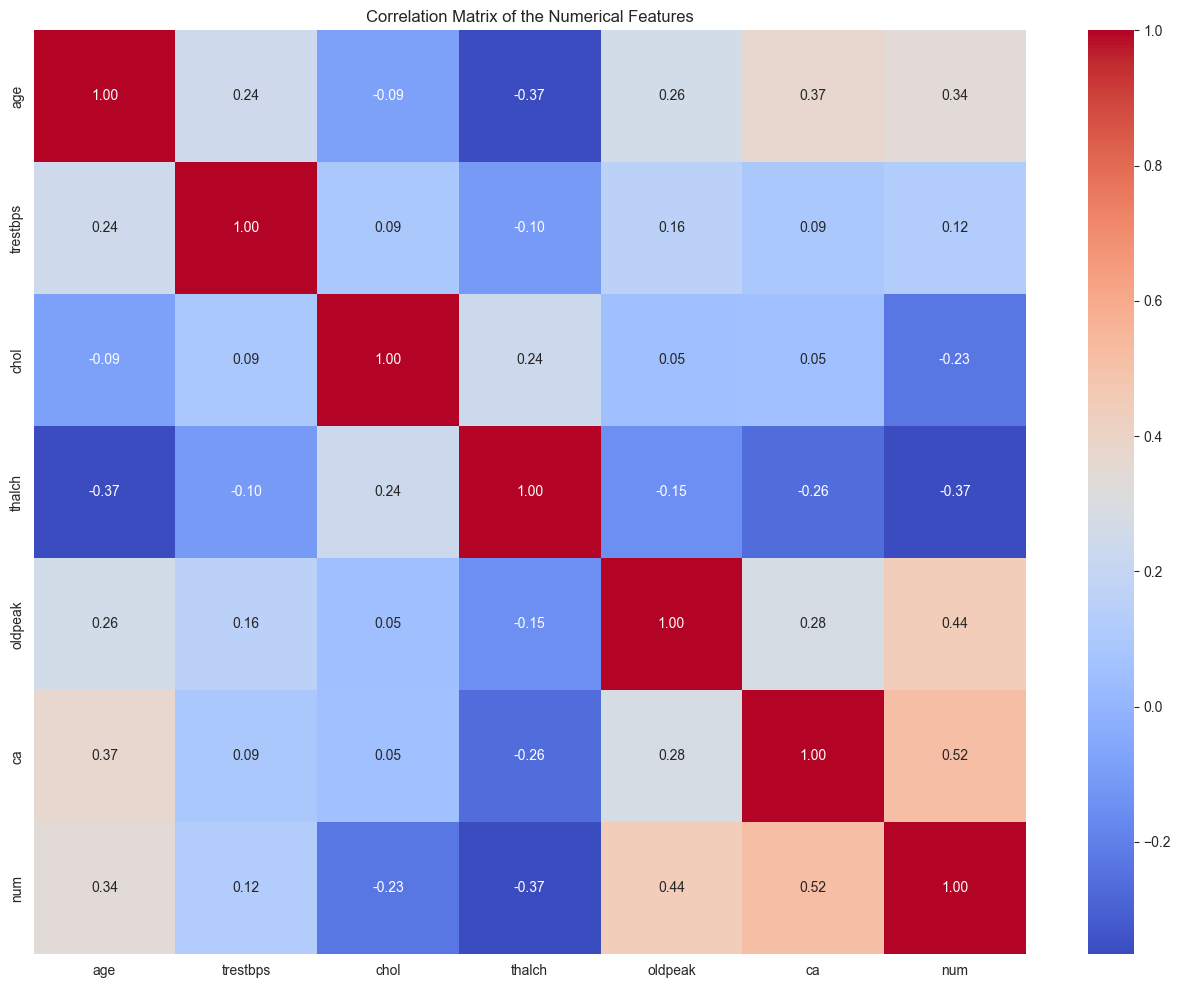

In [20]:
#imputing correlation heatmap to understand the dependancies of the numerical attributes
plt.figure(figsize=(16,12))
numerical_df = heart_df.select_dtypes(include=np.number)
numerical_df = numerical_df.drop(columns='id')
sns.heatmap(numerical_df.corr(),cmap='coolwarm',annot=True,fmt='.2f')
plt.title('Correlation Matrix of the Numerical Features')
plt.show()

In [ ]:
##STEP 6 : DATA PREPROCESSING 

